m# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

Load the dataset

In [2]:
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)
data = pd.get_dummies(data)

Display basic information

In [3]:
data.shape

(45000, 28)

Inspect data

In [4]:
print(data.info())
print(data.head())
print(data.isnull().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  float64
 1   person_income                       45000 non-null  float64
 2   person_emp_exp                      45000 non-null  int64  
 3   loan_amnt                           45000 non-null  float64
 4   loan_int_rate                       45000 non-null  float64
 5   loan_percent_income                 45000 non-null  float64
 6   cb_person_cred_hist_length          45000 non-null  float64
 7   credit_score                        45000 non-null  int64  
 8   loan_status                         45000 non-null  int64  
 9   person_gender_female                45000 non-null  bool   
 10  person_gender_male                  45000 non-null  bool   
 11  person_education_Associate          45000

Corellation matrix

                                    person_age  person_income  person_emp_exp  \
person_age                            1.000000       0.193698        0.954412   
person_income                         0.193698       1.000000        0.185987   
person_emp_exp                        0.954412       0.185987        1.000000   
loan_amnt                             0.050750       0.242290        0.044589   
loan_int_rate                         0.013402       0.001510        0.016631   
loan_percent_income                  -0.043299      -0.234177       -0.039862   
cb_person_cred_hist_length            0.861985       0.124316        0.824272   
credit_score                          0.178432       0.035919        0.186196   
loan_status                          -0.021476      -0.135808       -0.020481   
person_gender_female                 -0.017528      -0.010173       -0.015078   
person_gender_male                    0.017528       0.010173        0.015078   
person_education_Associate  

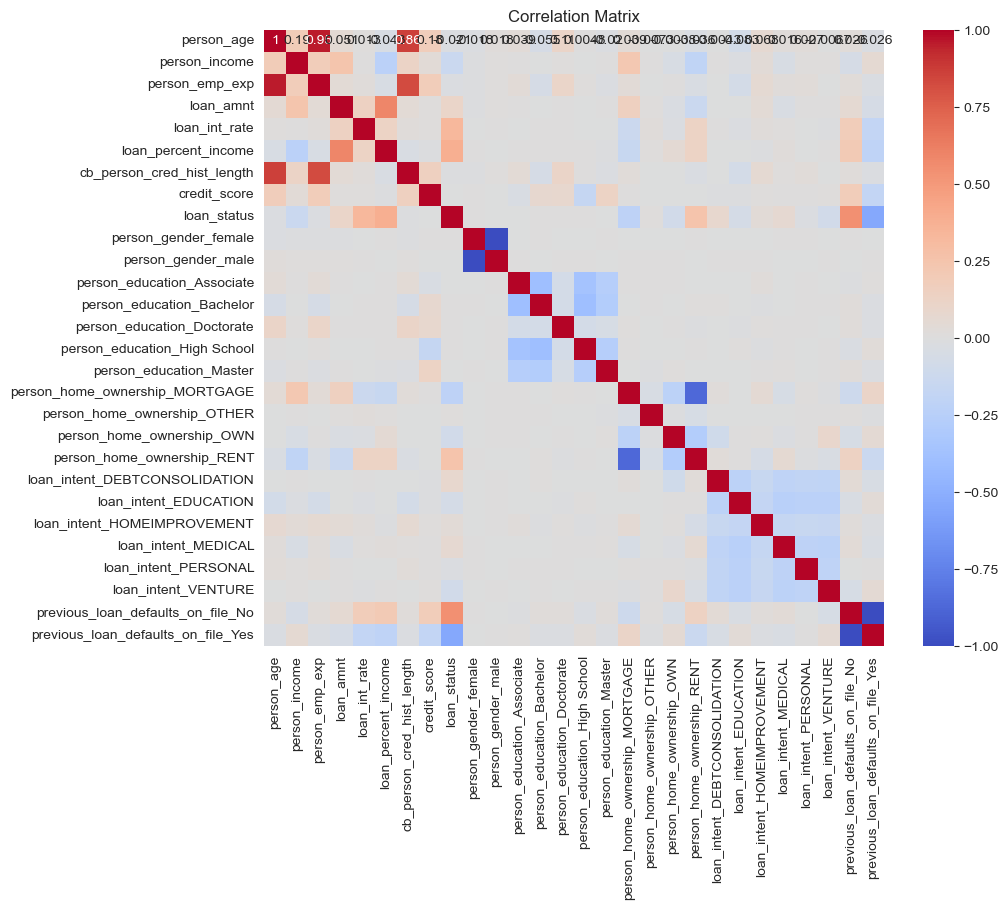

In [5]:
correlation_matrix = data.corr()
print(correlation_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Data Distribution

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


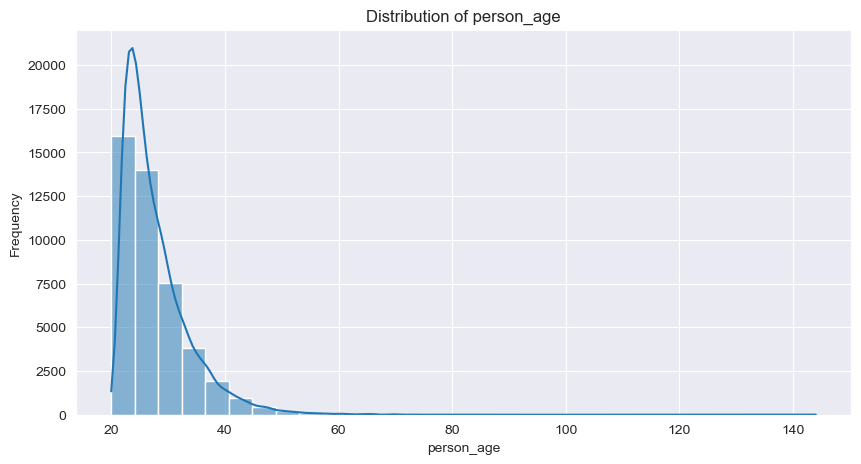

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


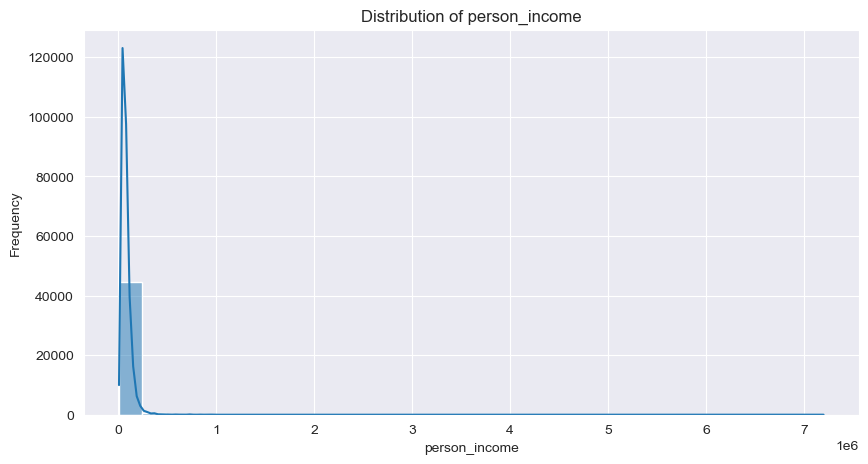

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


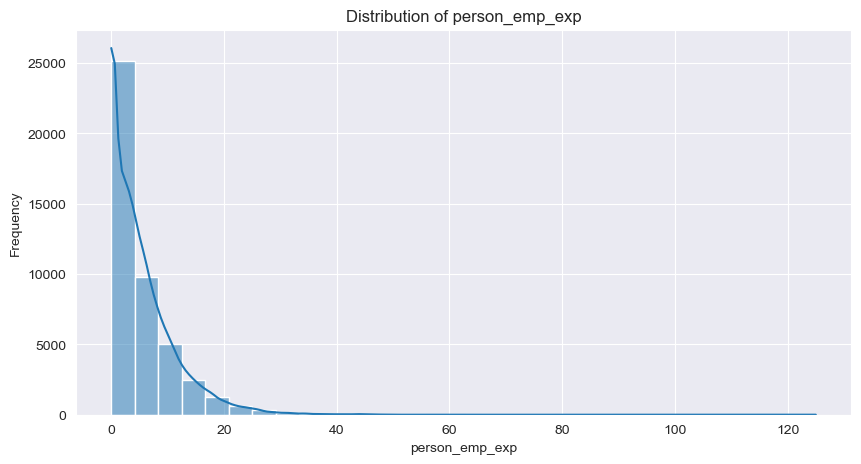

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


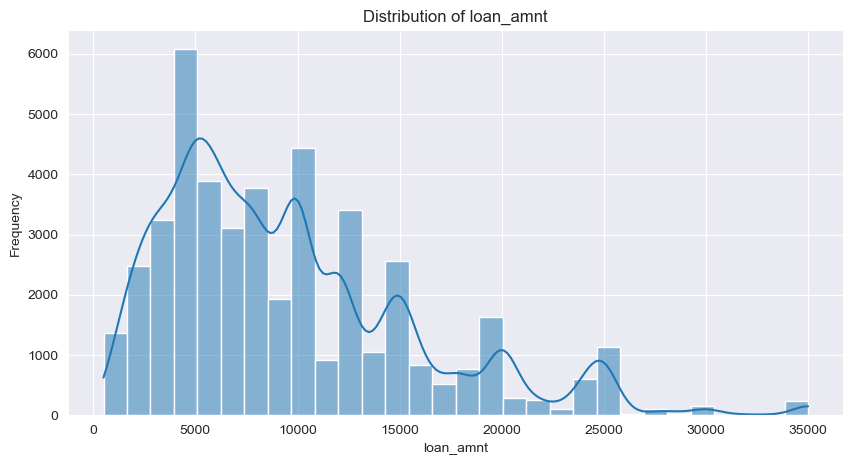

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


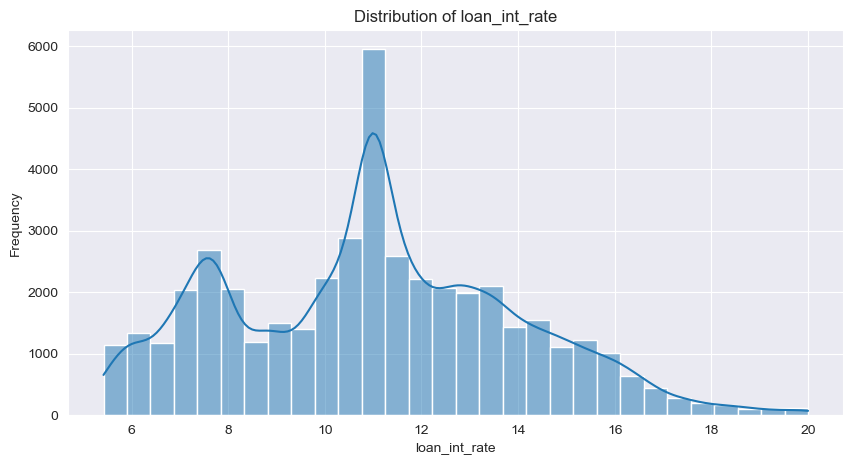

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


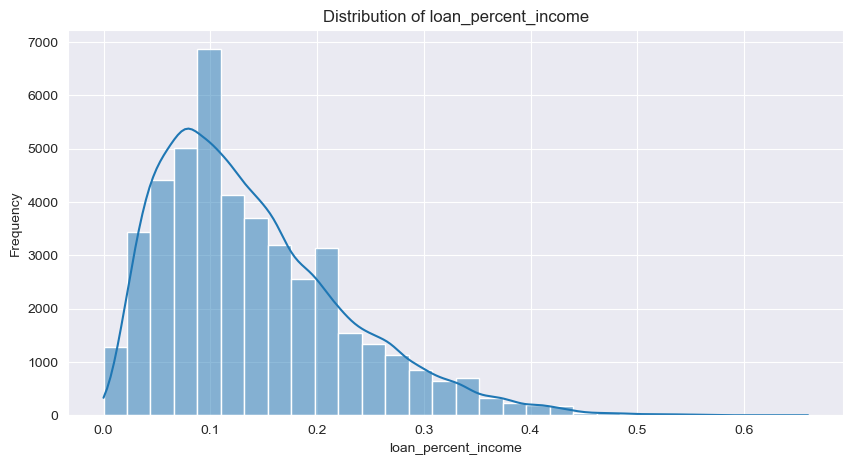

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


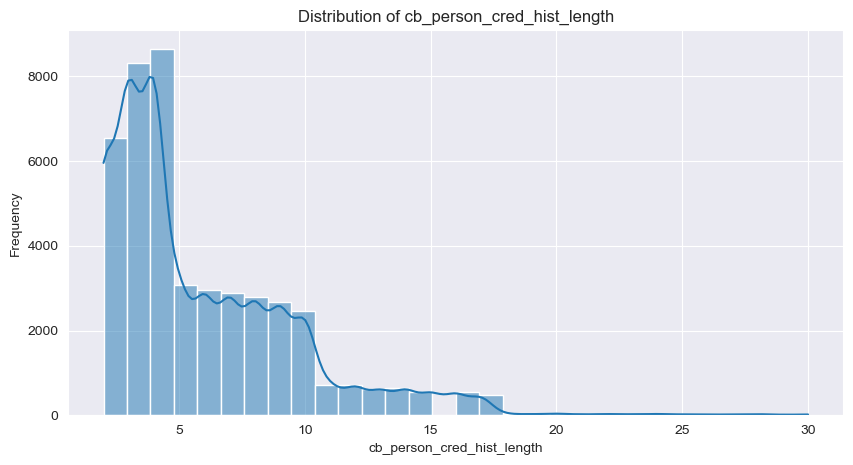

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


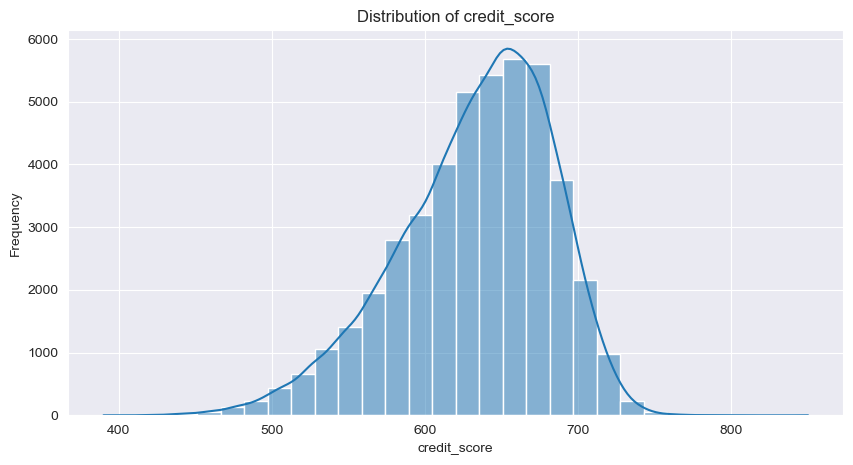

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


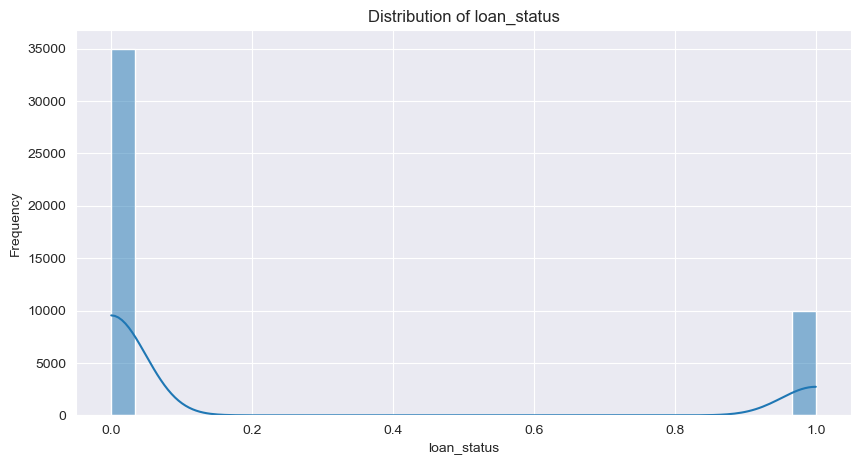

In [6]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Target and features

In [8]:
target_variable = 'loan_status'
feature_variables = [col for col in data.columns if col != target_variable]
print("Target Variable: ", target_variable)
print("Feature Variables: ", feature_variables)

Target Variable:  loan_status
Feature Variables:  ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_gender_female', 'person_gender_male', 'person_education_Associate', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_No', 'previous_loan_defaults_on_file_Yes']


Missing values

In [9]:
data.fillna(data.mean(), inplace=True)
data_encoded = pd.get_dummies(data, drop_first=True)

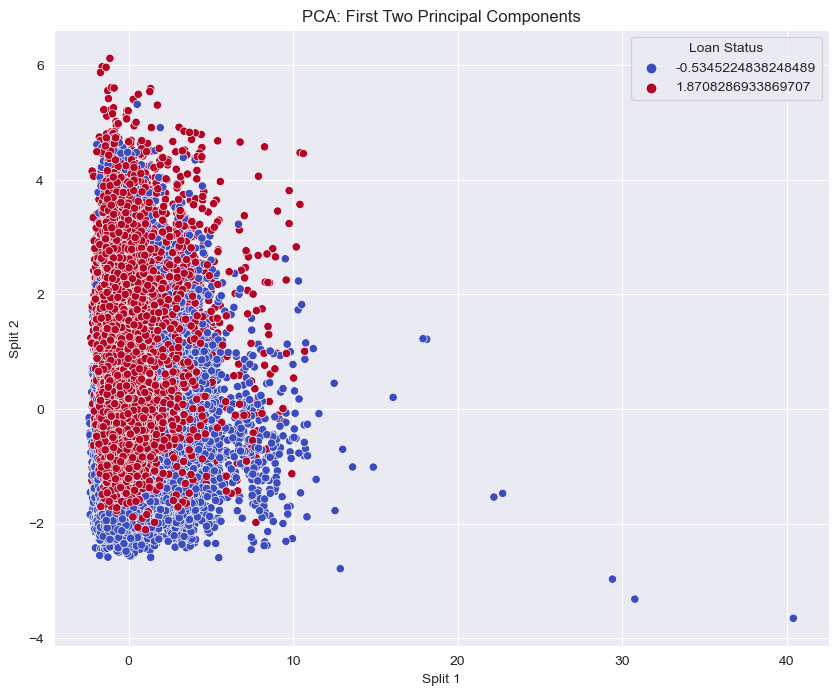

In [16]:
scaler = StandardScaler()
numerical_features = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded.drop(columns=[target_variable]))
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data_encoded[target_variable], palette="coolwarm")
plt.title('PCA: First Two Principal Components')
plt.xlabel('Split 1')
plt.ylabel('Split 2')
plt.legend(title='Loan Status')
plt.show()

Model Train

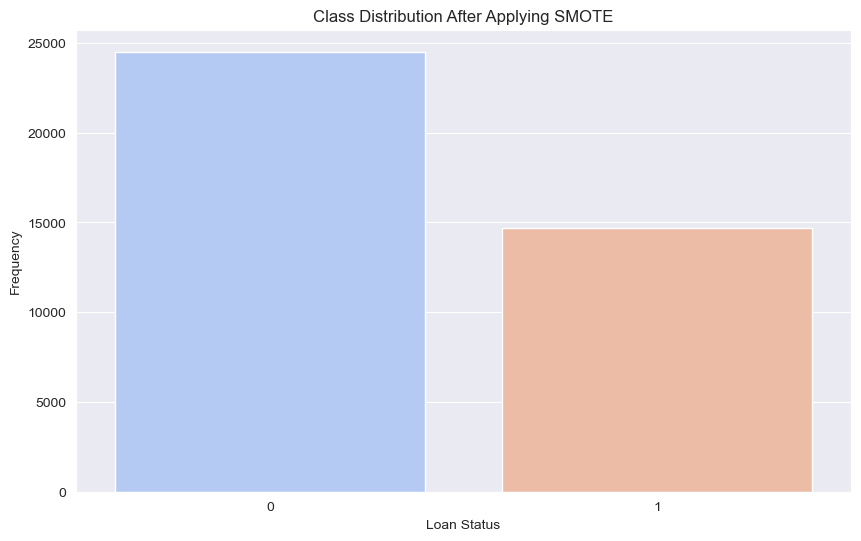

((39200, 27),
 loan_status
 0    24500
 1    14700
 Name: count, dtype: int64)

In [11]:
X = data_encoded.drop(columns=[target_variable])
y = data_encoded[target_variable].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)
smote = SMOTE(sampling_strategy=0.6, random_state=50)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette="coolwarm")
plt.title("Class Distribution After Applying SMOTE")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

X_train_res.shape, y_train_res.value_counts()

Class Imbalance

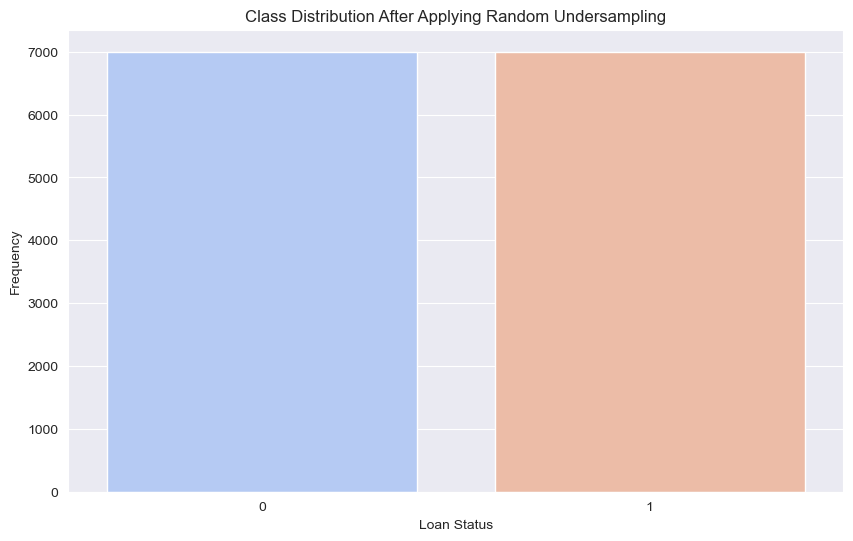

In [12]:
rus = RandomUnderSampler(random_state=50)
X_train_res_rus, y_train_res_rus = rus.fit_resample(X_train, y_train)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res_rus, palette="coolwarm")
plt.title("Class Distribution After Applying Random Undersampling")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

Other Models

In [13]:

models = {
    "Logistic Regression": LogisticRegression(random_state=50),
    "Random Forest": RandomForestClassifier(random_state=50),
    "Naive Bayes": GaussianNB()
}

for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    print(f"Results for {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10500
           1       0.72      0.82      0.77      3000

    accuracy                           0.89     13500
   macro avg       0.83      0.86      0.85     13500
weighted avg       0.90      0.89      0.89     13500

Accuracy: 0.8894074074074074

Results for Random Forest
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10500
           1       0.84      0.81      0.82      3000

    accuracy                           0.92     13500
   macro avg       0.89      0.88      0.89     13500
weighted avg       0.92      0.92      0.92     13500

Accuracy: 0.9224444444444444

Results for Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.66      0.79     10500
           1       0.45      1.00      0.63      3000

    accuracy                           0

Voting Classifier

In [14]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=50)),
        ('rf', RandomForestClassifier(random_state=50)),
        ('nb', GaussianNB())
    ],
    voting='soft'
)
voting_clf.fit(X_train_res, y_train_res)

y_pred_voting = voting_clf.predict(X_test)
print("Results for Voting Classifier")
print(classification_report(y_test, y_pred_voting))
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Voting Classifier
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     10500
           1       0.61      0.94      0.74      3000

    accuracy                           0.86     13500
   macro avg       0.80      0.89      0.82     13500
weighted avg       0.90      0.86      0.87     13500

Accuracy: 0.8562222222222222


K-Fold

In [15]:
scores = cross_val_score(LogisticRegression(random_state=42), X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross-Validation Accuracy Scores: [0.892      0.90311111 0.88522222 0.89366667 0.904     ]
Mean Accuracy: 0.8956000000000002


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
